In [1]:
import dataclasses as dc
from json import load
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
RESULTS_DIR = Path("./results_json/cityscapes/")

@dc.dataclass
class EvalResult:
    loss: float
    accuracy: float
    recall: float
    precision: float
    iou: float

In [3]:
def _get_activation_from_results_file(name: Path):
    return (str(name).split("\\")[-1]).split(".")[0]

def _load_results_file(name: Path) -> EvalResult:
    with open(name, "r") as f:
        loaded_json = load(f)
    
    return EvalResult(**loaded_json)

_get_activation_from_results_file(next(RESULTS_DIR.iterdir())), _load_results_file(next(RESULTS_DIR.iterdir()))

('gelu',
 EvalResult(loss=0.5413299202919006, accuracy=0.8429820537567139, recall=0.8017390966415405, precision=0.9075607061386108, iou=0.6463834047317505))

In [4]:
activation_names, results = zip(*[
    (_get_activation_from_results_file(n), _load_results_file(n)) for n in RESULTS_DIR.iterdir()
])
activation_names, results

(('gelu', 'leaky_relu', 'mish', 'swish'),
 (EvalResult(loss=0.5413299202919006, accuracy=0.8429820537567139, recall=0.8017390966415405, precision=0.9075607061386108, iou=0.6463834047317505),
  EvalResult(loss=0.5544934868812561, accuracy=0.8398852944374084, recall=0.7974351048469543, precision=0.9058696627616882, iou=0.6370142102241516),
  EvalResult(loss=0.5550049543380737, accuracy=0.8393409252166748, recall=0.796462893486023, precision=0.906750500202179, iou=0.6390745043754578),
  EvalResult(loss=0.5691854953765869, accuracy=0.8359976410865784, recall=0.7914679646492004, precision=0.9057879447937012, iou=0.6301195025444031)))

In [5]:
results_df = pd.json_normalize([dc.asdict(res_dc) for res_dc in results])
results_df["activation"] = activation_names
results_df.head()

,loss,accuracy,recall,precision,iou,activation
0,0.541330,0.842982,0.801739,0.907561,0.646383,gelu
1,0.554493,0.839885,0.797435,0.905870,0.637014,leaky_relu
2,0.555005,0.839341,0.796463,0.906751,0.639075,mish
3,0.569185,0.835998,0.791468,0.905788,0.630120,swish


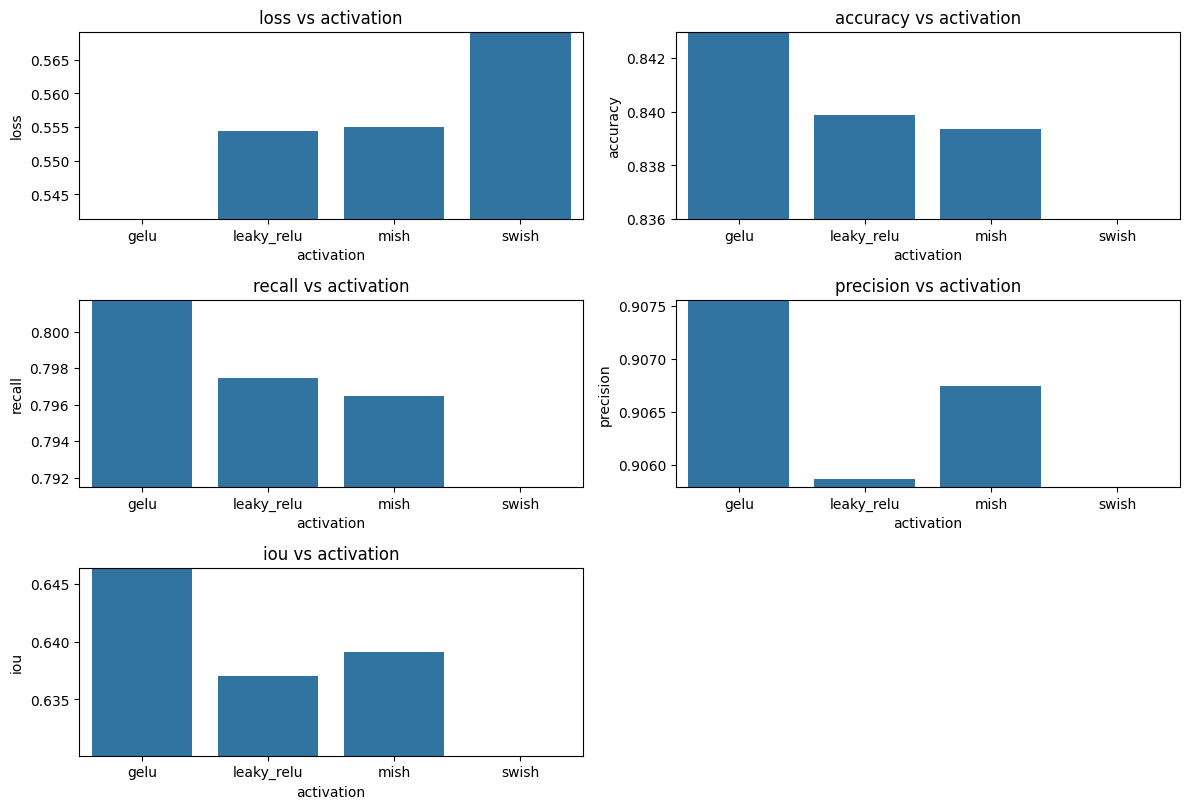

In [6]:
metrics = list(results_df.columns)[:-1]

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics, start=1):
    plt.subplot(3, 2, i)
    plt.title(f"{metric} vs activation")
    plt.tight_layout()
    plt.ylim((results_df[metric].min(), results_df[metric].max()))
    sns.barplot(data=results_df, x="activation", y=metric)
plt.show()